In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
#import seaborn as sns
from glob import glob
import IPython.display as ipd
import librosa

#create list of audio files
audio_files = glob('data/sounds/*/*.wav')

# Play audio file in Ipython
#ipd.Audio(audio_files[100])

#load audio file as numpy array and sample rate
signal_array, sr = librosa.load(audio_files[0])

print (signal_array.shape)
print(sr)

#trim audio file
signal_array_trimmed, sr_trimmed = librosa.effects.trim(signal_array, top_db=30)
print (signal_array_trimmed.shape)
print(sr_trimmed)

(72838,)
22050
(29184,)
[21504 50688]


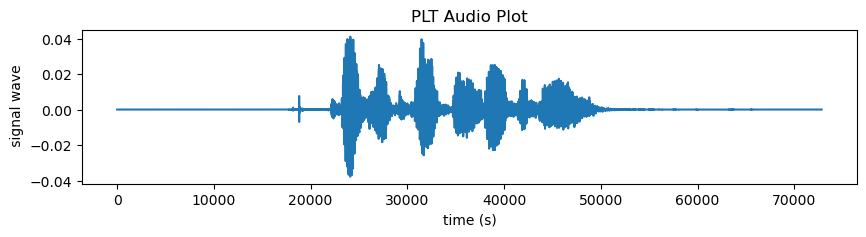

In [2]:
#Use Matlplotlib to visualize audio file
plt.figure(figsize=(10, 2))
plt.plot(signal_array)
plt.title('PLT Audio Plot')
plt.ylabel(' signal wave')
plt.xlabel('time (s)')
plt.show()

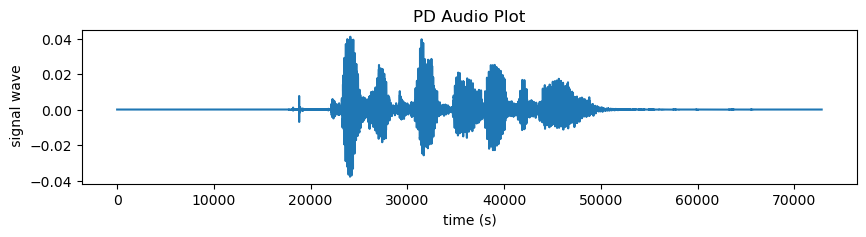

In [3]:
#Use Pandas to visualize audio file
pd.Series(signal_array).plot(figsize=(10, 2), title='PD Audio Plot', xlabel = 'time (s)', ylabel = ' signal wave')
plt.show()

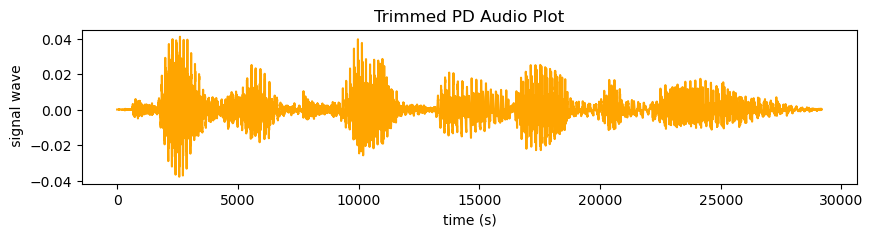

In [4]:
#Use Pandas to visualize audio file
pd.Series(signal_array_trimmed).plot(figsize=(10, 2), title='Trimmed PD Audio Plot', xlabel = 'time (s)', ylabel = ' signal wave', color = 'orange')
plt.show()

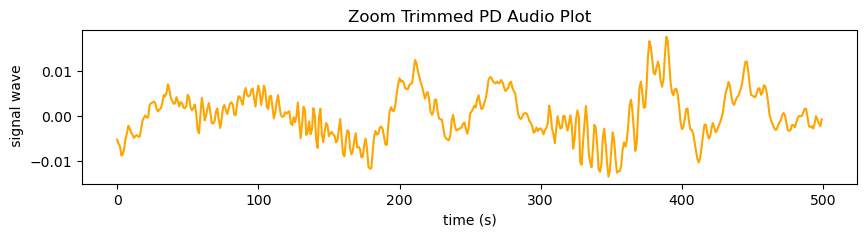

In [5]:
pd.Series(signal_array_trimmed[5000:5500]).plot(figsize=(10, 2), title='Zoom Trimmed PD Audio Plot', xlabel = 'time (s)', ylabel = ' signal wave', color = 'orange')
plt.show()

In [6]:
D = librosa.stft(signal_array)
print(D.shape)

S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
print(S_db.shape)

(1025, 143)
(1025, 143)


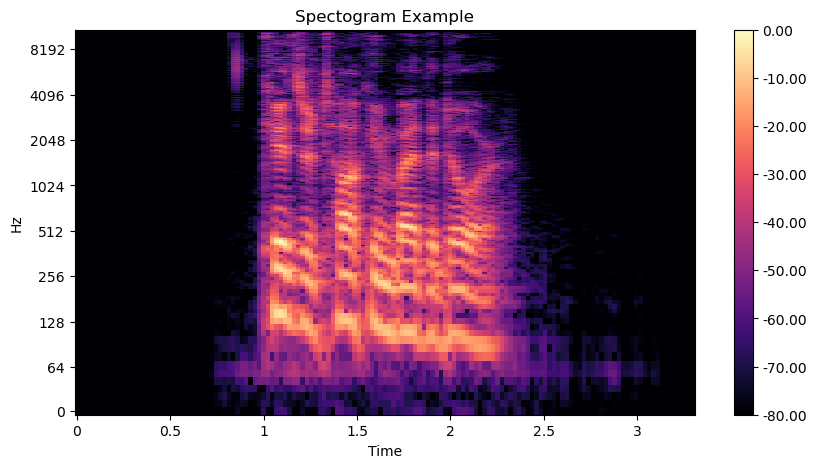

In [7]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Spectogram Example')
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

In [8]:
S = librosa.feature.melspectrogram(y=signal_array, sr=sr, n_mels=128 * 2,)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

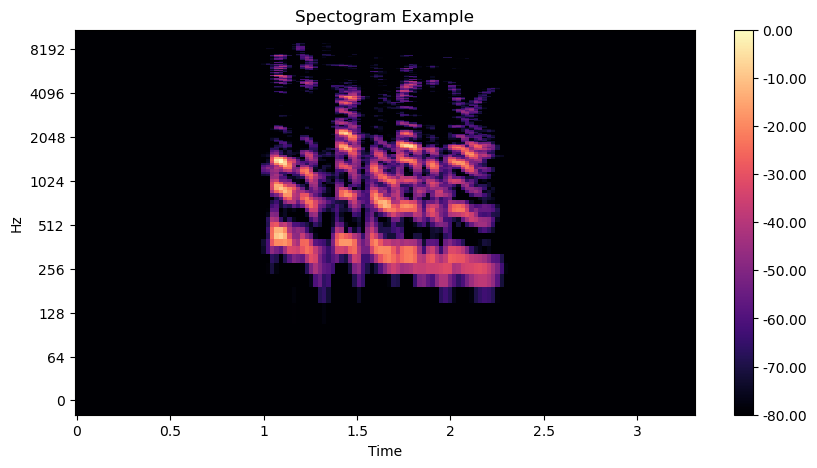

In [9]:
# Plot the transformed audio data
fig, ax = plt.subplots(figsize=(10, 5))
img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Spectogram Example')
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()